                      Date         Open         High          Low  \
count                 1313  1313.000000  1313.000000  1313.000000   
mean   2015-10-14 00:00:00   645.102285   660.689474   630.430274   
min    2013-12-27 00:00:00   176.900000   211.730000   171.510000   
25%    2014-11-20 00:00:00   327.580000   334.660000   320.480000   
50%    2015-10-14 00:00:00   463.550000   478.620000   454.940000   
75%    2016-09-06 00:00:00   688.000000   705.260000   669.590000   
max    2017-07-31 00:00:00  2953.220000  2999.910000  2840.530000   
std                    NaN   535.041809   556.127598   517.124878   

             Close        Volume    Market Cap  Daily_Change  
count  1313.000000  1.313000e+03  1.313000e+03   1313.000000  
mean    646.565819  1.481643e+08  9.765525e+09      1.463534  
min     178.100000  2.857830e+06  2.427830e+09   -293.590000  
25%     327.920000  2.071070e+07  4.593400e+09     -4.620000  
50%     463.620000  4.530140e+07  6.729120e+09      0.610000  


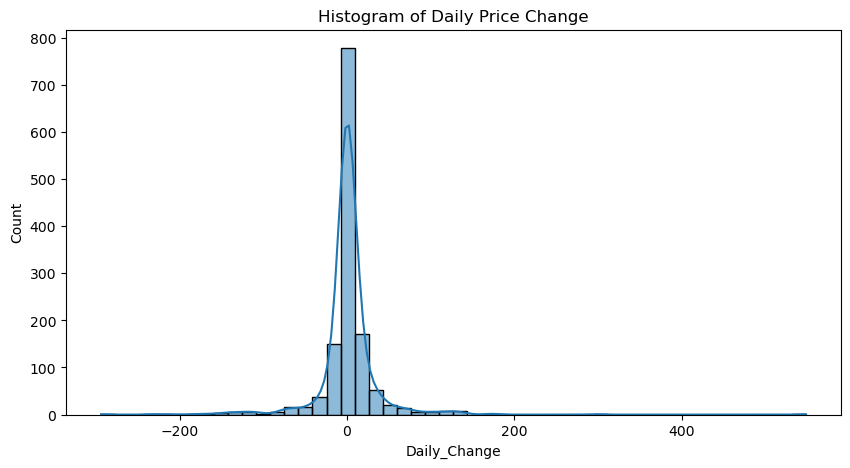

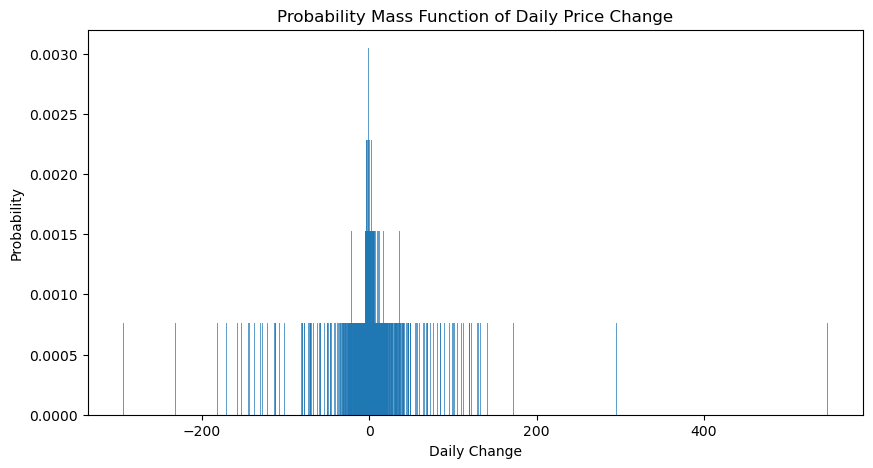

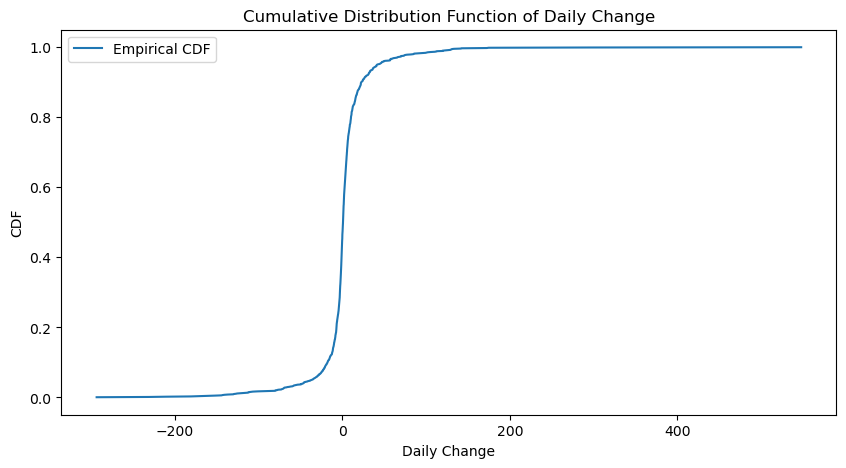

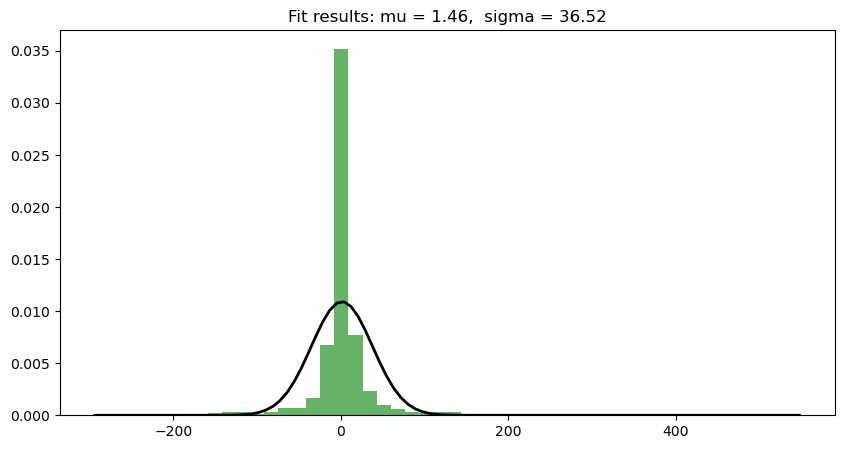

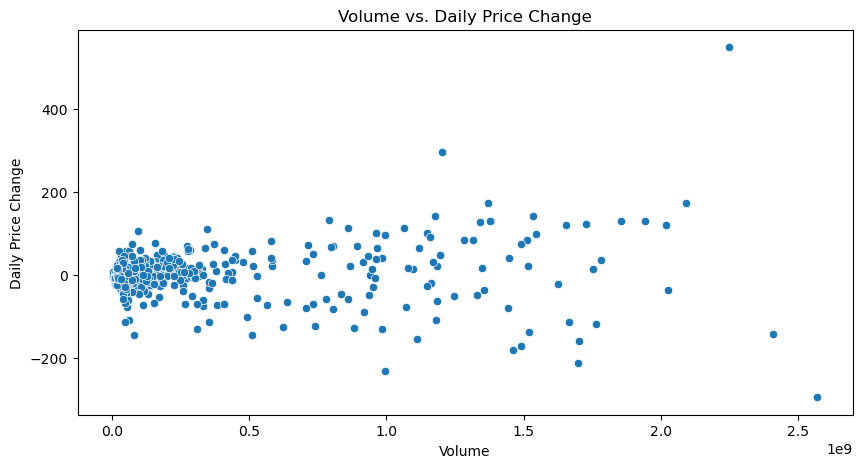

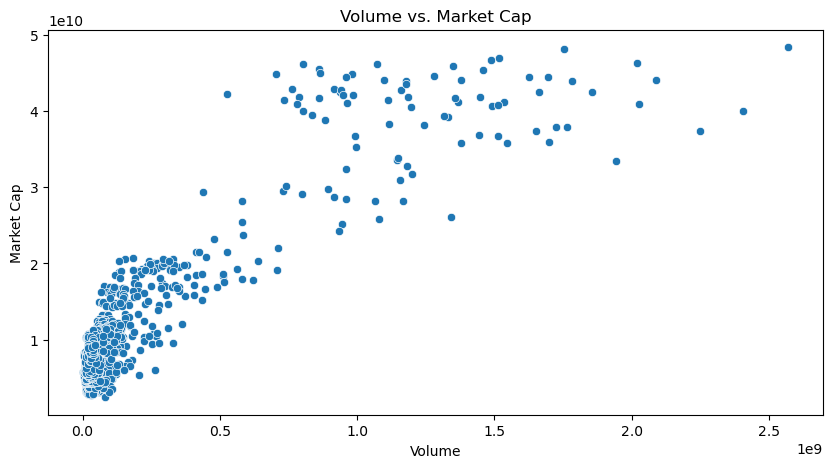

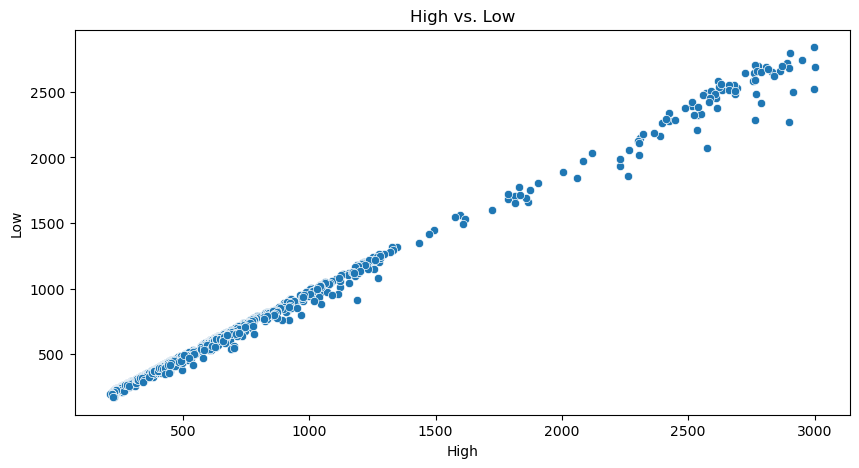

Covariance between Volume and Market Cap: 2604109696370006528.00
Pearson's correlation between Volume and Market Cap: 0.89
Covariance between High and Low: 286942.90
Pearson's correlation between High and Low: 1.00


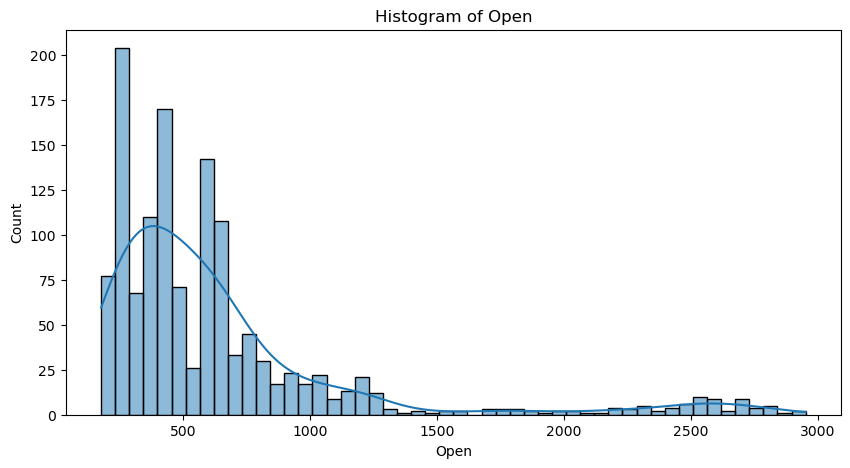

Outliers in Open:
        Open
0    2763.24
1    2724.39
2    2807.02
3    2679.73
4    2538.71
..       ...
146  1273.21
147  1267.47
148  1254.29
149  1277.43
150  1250.71

[108 rows x 1 columns]


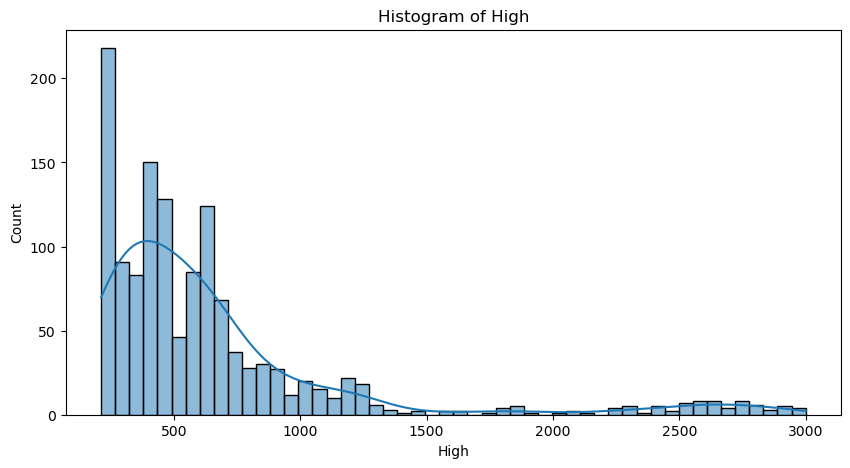

Outliers in High:
        High
0    2889.62
1    2758.53
2    2808.76
3    2897.45
4    2693.32
..       ...
147  1276.00
148  1267.29
149  1279.40
150  1280.31
151  1262.13

[105 rows x 1 columns]


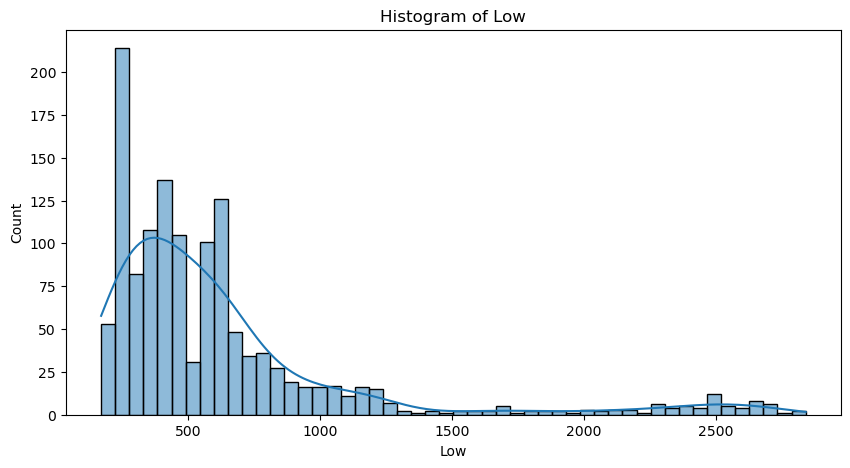

Outliers in Low:
         Low
0    2720.61
1    2644.85
2    2692.80
3    2679.73
4    2529.34
..       ...
147  1264.60
148  1238.06
149  1230.51
150  1250.71
151  1215.62

[115 rows x 1 columns]


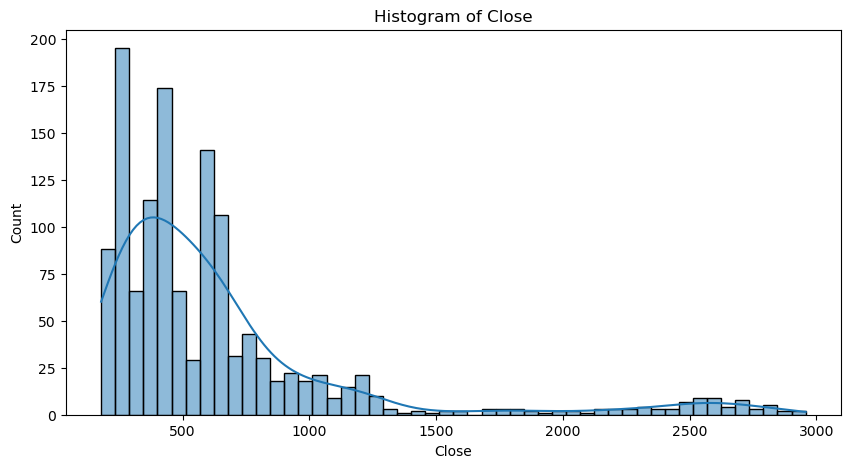

Outliers in Close:
       Close
0    2875.34
1    2757.18
2    2726.45
3    2809.01
4    2671.78
..       ...
147  1272.83
148  1267.12
149  1255.15
150  1274.99
151  1251.01

[109 rows x 1 columns]


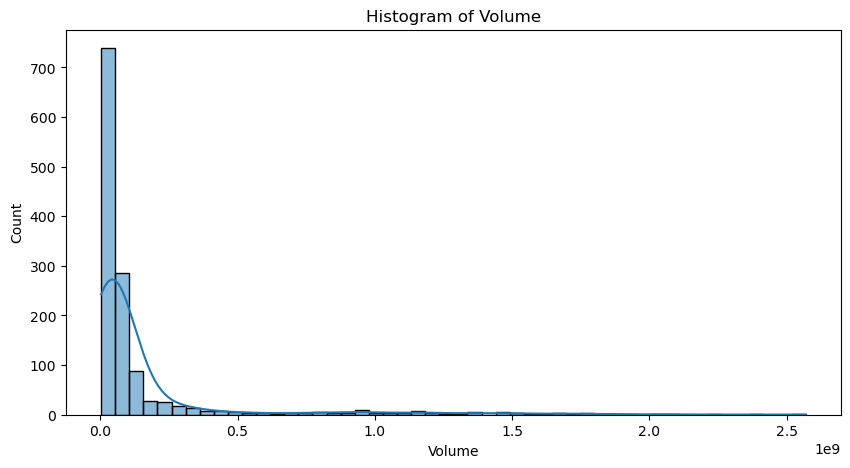

Outliers in Volume:
           Volume
0    8.605750e+08
1    7.059430e+08
2    8.037460e+08
3    1.380100e+09
4    7.891040e+08
..            ...
410  2.716340e+08
413  2.432950e+08
414  2.770850e+08
635  2.639000e+08
636  2.061620e+08

[180 rows x 1 columns]


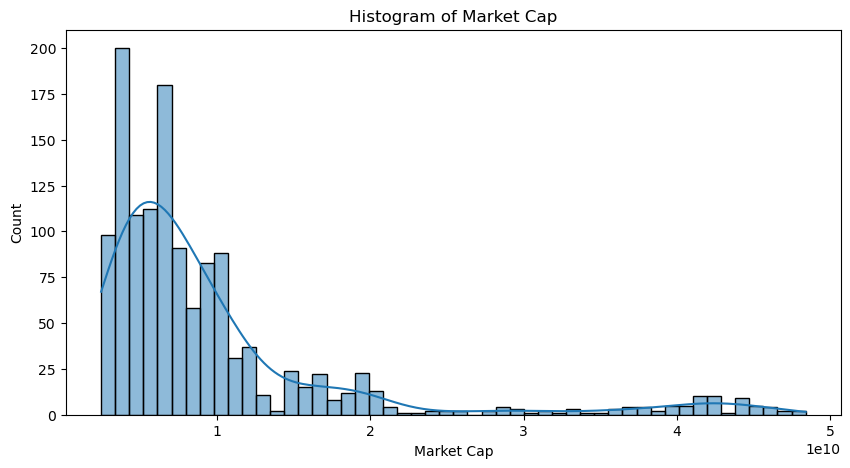

Outliers in Market Cap:
      Market Cap
0    45535800000
1    44890700000
2    46246700000
3    44144400000
4    41816500000
..           ...
150  20253700000
151  19829800000
152  19104800000
153  19113600000
157  18974400000

[133 rows x 1 columns]
Mean Squared Error: 1417.5601
Regression Coefficients: [ 15.10533986 -10.78107726]


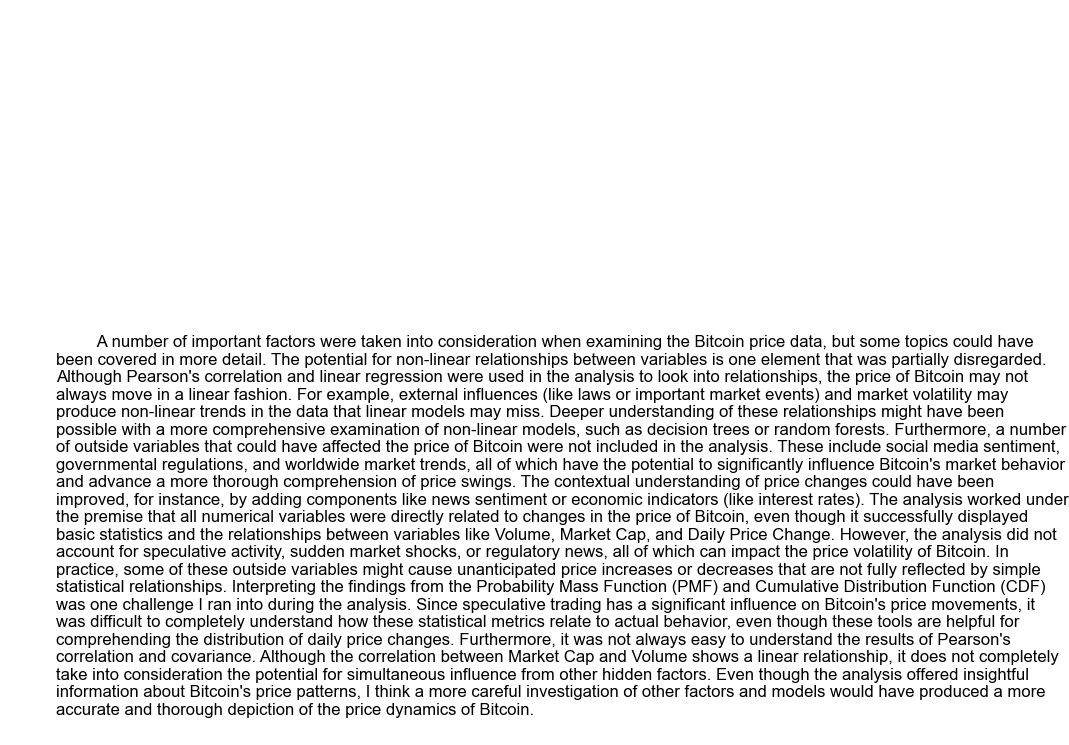

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, pearsonr
from statsmodels.distributions.empirical_distribution import ECDF
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Adding the analysis paragraph at the end
plt.figure(figsize=(12, 8))
plt.text(0.05, 0.5, 
         """

# Load dataset
df = pd.read_csv('bitcoin_price_Training - Training.csv')

# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Convert numeric columns with commas to proper float format
for col in ['Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap']:
    df[col] = df[col].astype(str).str.replace(',', '', regex=True)
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop missing values
df.dropna(inplace=True)

# Feature Engineering: Calculate daily price change
df['Daily_Change'] = df['Close'] - df['Open']

# Descriptive Statistics
print(df.describe())

# Histogram for 'Daily_Change'
plt.figure(figsize=(10, 5))
sns.histplot(df['Daily_Change'], bins=50, kde=True)
plt.title('Histogram of Daily Price Change')
plt.show()

# PMF Comparison
pmf_data = df['Daily_Change'].value_counts(normalize=True)
plt.figure(figsize=(10, 5))
plt.bar(pmf_data.index, pmf_data.values, alpha=0.7)
plt.title('Probability Mass Function of Daily Price Change')
plt.xlabel('Daily Change')
plt.ylabel('Probability')
plt.show()

# CDF Plot
if not df['Daily_Change'].empty:
    ecdf = ECDF(df['Daily_Change'])
    plt.figure(figsize=(10, 5))
    plt.plot(ecdf.x, ecdf.y, label='Empirical CDF')
    plt.title('Cumulative Distribution Function of Daily Change')
    plt.xlabel('Daily Change')
    plt.ylabel('CDF')
    plt.legend()
    plt.show()
else:
    print("Warning: No data available for CDF calculation.")

# Analytical Distribution Fit
mu, sigma = norm.fit(df['Daily_Change'])
x = np.linspace(df['Daily_Change'].min(), df['Daily_Change'].max(), 100)
p = norm.pdf(x, mu, sigma)
plt.figure(figsize=(10, 5))
plt.hist(df['Daily_Change'], bins=50, density=True, alpha=0.6, color='g')
plt.plot(x, p, 'k', linewidth=2)
plt.title(f'Fit results: mu = {mu:.2f},  sigma = {sigma:.2f}')
plt.show()

# Scatter plot for correlation analysis
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['Volume'], y=df['Daily_Change'])
plt.title('Volume vs. Daily Price Change')
plt.xlabel('Volume')
plt.ylabel('Daily Price Change')
plt.show()

# Scatter plot: Volume vs. Market Cap (Correlation and Causation Analysis)
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['Volume'], y=df['Market Cap'])
plt.title('Volume vs. Market Cap')
plt.xlabel('Volume')
plt.ylabel('Market Cap')
plt.show()

# Scatter plot: High vs. Low (Correlation and Causation Analysis)
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['High'], y=df['Low'])
plt.title('High vs. Low')
plt.xlabel('High')
plt.ylabel('Low')
plt.show()

# Covariance and Pearson's Correlation between Volume and Market Cap
cov_volume_market_cap = np.cov(df['Volume'], df['Market Cap'])[0, 1]
pearson_corr_volume_market_cap, _ = pearsonr(df['Volume'], df['Market Cap'])
print(f"Covariance between Volume and Market Cap: {cov_volume_market_cap:.2f}")
print(f"Pearson's correlation between Volume and Market Cap: {pearson_corr_volume_market_cap:.2f}")

# Covariance and Pearson's Correlation between High and Low
cov_high_low = np.cov(df['High'], df['Low'])[0, 1]
pearson_corr_high_low, _ = pearsonr(df['High'], df['Low'])
print(f"Covariance between High and Low: {cov_high_low:.2f}")
print(f"Pearson's correlation between High and Low: {pearson_corr_high_low:.2f}")

# Histogram for each of the 5 variables
variables = ['Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap']
for var in variables:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[var], bins=50, kde=True)
    plt.title(f'Histogram of {var}')
    plt.show()

    # Outlier detection (IQR method)
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[var] < lower_bound) | (df[var] > upper_bound)]
    print(f'Outliers in {var}:')
    print(outliers[[var]])

# Hypothesis Testing (Linear Regression)
X = df[['Volume', 'Market Cap']]
Y = df['Daily_Change']

# Check if dataset is empty before fitting
if X.empty or Y.empty:
    print("Error: Feature matrix or target variable is empty.")
else:
    # Standardize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Train-test split
    X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)
    
    # Fit regression model
    model = LinearRegression()
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    
    # Print regression metrics
    mse = mean_squared_error(Y_test, Y_pred)
    print(f'Mean Squared Error: {mse:.4f}')
    print(f'Regression Coefficients: {model.coef_}')

# Adding the analysis paragraph at the end
plt.figure(figsize=(12, 8))
plt.text(0.05, 0.5, 
         """
         In conclusion of the EDA of the Bitcoin price data has supported the hypothesis by showing a linear relationship between the price of bitcoin and the six chosen variables supports that the variables can influence hthe price, specifcally the relationship between price and market caps. However, a number of important factors were taken into consideration when examining the Bitcoin price data, but some topics could have been covered in more detail. The potential for non-linear relationships between variables is one element that was partially disregarded. Although Pearson's correlation and linear regression were used in the analysis to look into relationships, the price of Bitcoin may not always move in a linear fashion. For example, external influences (like laws or important market events) and market volatility may produce non-linear trends in the data that linear models may miss. Deeper understanding of these relationships might have been possible with a more comprehensive examination of non-linear models, such as decision trees or random forests. Furthermore, a number of outside variables that could have affected the price of Bitcoin were not included in the analysis. These include social media sentiment, governmental regulations, and worldwide market trends, all of which have the potential to significantly influence Bitcoin's market behavior and advance a more thorough comprehension of price swings. The contextual understanding of price changes could have been improved, for instance, by adding components like news sentiment or economic indicators (like interest rates). The analysis worked under the premise that all numerical variables were directly related to changes in the price of Bitcoin, even though it successfully displayed basic statistics and the relationships between variables like Volume, Market Cap, and Daily Price Change. However, the analysis did not account for speculative activity, sudden market shocks, or regulatory news, all of which can impact the price volatility of Bitcoin. In practice, some of these outside variables might cause unanticipated price increases or decreases that are not fully reflected by simple statistical relationships. Interpreting the findings from the Probability Mass Function (PMF) and Cumulative Distribution Function (CDF) was one challenge I ran into during the analysis. Since speculative trading has a significant influence on Bitcoin's price movements, it was difficult to completely understand how these statistical metrics relate to actual behavior, even though these tools are helpful for comprehending the distribution of daily price changes. Furthermore, it was not always easy to understand the results of Pearson's correlation and covariance. Although the correlation between Market Cap and Volume shows a linear relationship, it does not completely take into consideration the potential for simultaneous influence from other hidden factors. Even though the analysis offered insightful information about Bitcoin's price patterns, I think a more careful investigation of other factors and models would have produced a more accurate and thorough depiction of the price dynamics of Bitcoin.
         """, 
         wrap=True, fontsize=12, ha='left', va='top', color='black', fontname='Arial')
plt.axis('off')
plt.show()

## 
